# TP 2 : Training a neural network

## 1) Training a neural network with keras

In [66]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import math

In [5]:
digits = load_digits()

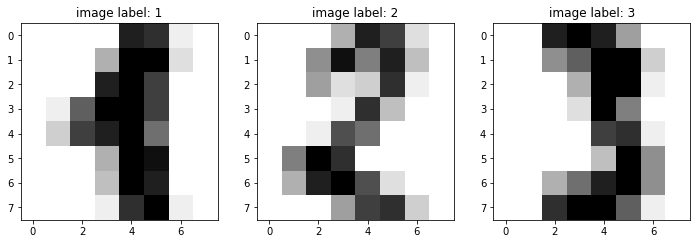

In [6]:
sample_index = np.array([11, 50, 62])
plt.figure(figsize=(12, 12))
for i in np.arange(sample_index.shape[0]):
    plt.subplot(131 + i)
    plt.imshow(digits.images[sample_index[i]], cmap=plt.cm.gray_r,
           interpolation='nearest')
    plt.title("image label: %d" % digits.target[sample_index[i]])
plt.show()

In [35]:
digits.keys()
digits.data.size

115008

In [23]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

### Preprocessing

In [47]:
#TODO, output X_train with preprocessing and Y_train as a one-hot enconding vectors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target)

scaler = StandardScaler()
scaler.fit(x_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

### Building and training the neural network

In [64]:

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

n_i = X_train.shape[1]
n_h = 50
n_o = 10

model = Sequential()
model.add(Dense(n_h, input_dim=n_i))
model.add(Activation("tanh"))

model.add(Dense(30))

model.add(Dense(n_o))

model.add(Activation("softmax"))



model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=100, batch_size=32)


Train on 1347 samples, validate on 450 samples
Epoch 1/100
1347/1347 [==============================] - 1s 656us/step - loss: 2.1602 - acc: 0.2895 - val_loss: 1.7362 - val_acc: 0.4556
Epoch 2/100
1347/1347 [==============================] - 0s 80us/step - loss: 1.4648 - acc: 0.5486 - val_loss: 1.2660 - val_acc: 0.6422
Epoch 3/100
1347/1347 [==============================] - 0s 80us/step - loss: 1.0925 - acc: 0.7001 - val_loss: 0.9963 - val_acc: 0.7356
Epoch 4/100
1347/1347 [==============================] - 0s 75us/step - loss: 0.8681 - acc: 0.7817 - val_loss: 0.8252 - val_acc: 0.8022
Epoch 5/100
1347/1347 [==============================] - 0s 80us/step - loss: 0.7191 - acc: 0.8344 - val_loss: 0.7064 - val_acc: 0.8333
Epoch 6/100
1347/1347 [==============================] - 0s 75us/step - loss: 0.6109 - acc: 0.8671 - val_loss: 0.6202 - val_acc: 0.8489
Epoch 7/100
1347/1347 [==============================] - 0s 76us/step - loss: 0.5316 - acc: 0.8931 - val_loss: 0.5560 - val_acc: 0.8622


1347/1347 [==============================] - 0s 75us/step - loss: 0.0638 - acc: 0.9903 - val_loss: 0.1487 - val_acc: 0.9533
Epoch 61/100
1347/1347 [==============================] - 0s 79us/step - loss: 0.0626 - acc: 0.9911 - val_loss: 0.1476 - val_acc: 0.9533
Epoch 62/100
1347/1347 [==============================] - 0s 94us/step - loss: 0.0614 - acc: 0.9911 - val_loss: 0.1468 - val_acc: 0.9533
Epoch 63/100
1347/1347 [==============================] - 0s 98us/step - loss: 0.0604 - acc: 0.9926 - val_loss: 0.1459 - val_acc: 0.9533
Epoch 64/100
1347/1347 [==============================] - 0s 94us/step - loss: 0.0592 - acc: 0.9926 - val_loss: 0.1450 - val_acc: 0.9533
Epoch 65/100
1347/1347 [==============================] - 0s 94us/step - loss: 0.0582 - acc: 0.9926 - val_loss: 0.1439 - val_acc: 0.9533
Epoch 66/100
1347/1347 [==============================] - 0s 86us/step - loss: 0.0572 - acc: 0.9926 - val_loss: 0.1429 - val_acc: 0.9533
Epoch 67/100
1347/1347 [==============================

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 50)                3250      
_________________________________________________________________
activation_23 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
_________________________________________________________________


## 2) Training a neural network with numpy

Start by implementing the softmax function, sigmoid and its derivative, as well as negative log-likelihood:

In [ ]:
def softmax(X):   
    return np.exp(x) / np.sum(np.exp(x),axis=0)

def sigmoid(X):
    res=1/(1+exp(-X))
    return res

def dsigmoid(X):
    
    return sigmoid(X)*sigmoid(1-X)

def nll(Y_true, Y_pred):
    
    return -np.sum(Y_true*math.log(Y_pred),axis=0)

You can complete the following python class to get your numpy network. This class is designed to be "scikit like", meaning that once it has been correctly completed, you can just execute 

-model = NeuralNet(n_features, n_hidden, n_classes); model.fit(X_train,Y_train,lr=0.1, n_epochs=20)

to get it to work. Hints about how to fill the methods can be found in the pdf subject.

In [ ]:
class NeuralNet():
    """MLP with 1 hidden layer and a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = None
        self.b_h = None
        self.W_o = None
        self.b_o = None
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        return y
    
    def forward_with_hidden(self, X):
        # TODO
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return L

    def grad_loss(self, x, y_true):
        # TODO
        return grads

    def train_sample(self, x, y, lr):
        # TODO

    def fit(self, X_train, Y_train , lr, n_epochs):
        # TODO
        return losses
    
    def predict(self, X):
        # TODO
        return 

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)